# LOGISTIC REGRESSION
1. Trong PLA, hàm kích hoạt là hàm sgn, đầu ra chỉ nhận được một trong hai giá trị là 1 hoặc -1, phù hợp với các bài toán phân lớp nhị phân.
2. Trong thuật toán logisctic regression, ta sẽ thỏa luận một mô hình tuyến tính với hàm kích hoạt khác, hàm sigmod, đầu ra thể hiện dưới dạng xác suất.
source: 

https://machinelearningcoban.com/2017/01/27/logisticregression/

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# 1.Ví dụ 1: Bài toán dự đoán điểm của học sinh dựa vào thời gian ôn thi.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
print(X)
print(y)
print(X.shape)
print(y.shape)

[[0.5  0.75 1.   1.25 1.5  1.75 1.75 2.   2.25 2.5  2.75 3.   3.25 3.5
  4.   4.25 4.5  4.75 5.   5.5 ]]
[0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1]
(1, 20)
(20,)


Biểu diễn dữ liệu

[0, 1, 2, 3, 4, 5, 7, 9, 11, 13]
[6, 8, 10, 12, 14, 15, 16, 17, 18, 19]
[array([0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.5 , 3.  , 3.5 ])] [0 0 0 0 0 0 0 0 0 0]


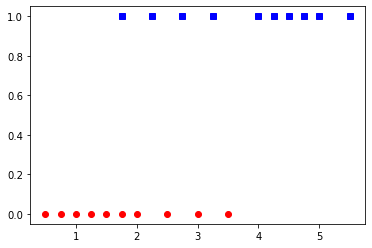

In [3]:
index_0 = []
index_1 = []
for i in range(y.shape[0]):
    if y[i] == 0:
        index_0.append(i)
    if y[i] == 1:
        index_1.append(i)
print(index_0)
print(index_1)
print(list(X[:,index_0]),y[index_0])
plt.plot(X[:,index_0].reshape(-1,1),y[index_0],'ro')
plt.plot(X[:,index_1].reshape(-1,1),y[index_1],'bs')
plt.show()

Ta nhận thấy rằng dữ liệu không là linearly separable vì vậy không thể áp dụng PLA ở đây.

In [4]:
# Chuẩn hóa dữ liệu
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]]).T
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
X_bar = np.concatenate((np.ones((X.shape[0],1)), X), axis = 1)
print(X_bar)

[[1.   0.5 ]
 [1.   0.75]
 [1.   1.  ]
 [1.   1.25]
 [1.   1.5 ]
 [1.   1.75]
 [1.   1.75]
 [1.   2.  ]
 [1.   2.25]
 [1.   2.5 ]
 [1.   2.75]
 [1.   3.  ]
 [1.   3.25]
 [1.   3.5 ]
 [1.   4.  ]
 [1.   4.25]
 [1.   4.5 ]
 [1.   4.75]
 [1.   5.  ]
 [1.   5.5 ]]


Thiết lập hàm sigmoid.

In [5]:
def sigmoid(S):
    return 1/(1 + np.exp(-S))


Thiết lập hàm xác suất.

In [6]:
def prob(w, X):
    return sigmoid(X.dot(w))

Thiết lập hàm tính hàm mất mát.

In [7]:
def loss(w, X, y, lam):
    z = prob(w, X)
    return -np.mean(y*np.log(z) + (1-y)*np.log(1-z)) + 0.5*lam/X.shape[0]*np.sum(w*w)

In [8]:
def logistic_regression(w_init, X, y, lam = 0.001, lr = 0.1, nepoches = 2000):
    # lam - regularization paramether, lr - learning rate, nepoches - number of epoches
    N, d = X.shape[0], X.shape[1]
    w = w_old = w_init 
    # store history of loss in loss_hist
    loss_hist = [loss(w_init, X, y, lam)]
    ep = 0 
    while ep < nepoches: 
        ep += 1
        mix_ids = np.random.permutation(N)
        for i in mix_ids:
            xi = X[i]
            yi = y[i]
            zi = sigmoid(xi.dot(w))
            w = w - lr*((zi - yi)*xi + lam*w)
        loss_hist.append(loss(w, X, y, lam))
        if np.linalg.norm(w - w_old)/d < 1e-6:
            break 
        w_old = w
    return w, loss_hist 

In [9]:
w_init = np.random.randn(X_bar.shape[1])
lam = 0.0001
w, loss_hist = logistic_regression(w_init, X_bar, y, lam, lr = 0.05, nepoches = 500)
print('Solution of Logistic Regression:', w)
print('Final loss:', loss(w, X_bar, y, lam))
print(loss_hist[-1])

Solution of Logistic Regression: [-4.0738129   1.55914454]
Final loss: 0.4030515303413973
0.4030515303413973


Hàm dự đoán đầu ra của các điểm dữ liệu mới

In [10]:
def predict(w, X, threshold=0.5):
    res = np.zeros(X.shape[0])
    res[np.where(prob(w,X)>threshold)[0]] = 1
    return res

Chẳng hạn xét một người ôn thi 1.5h và một người ôn thi 4h.


In [11]:
X_test = np.array([[1, 1.5],[1, 4]])

Dự đoán xác suất của hai người này.

In [12]:
print(w)
print(prob(w,X_test))

[-4.0738129   1.55914454]
[0.14993689 0.89685563]


Dự đoán đỗ, trượt của người này (nếu tỉ lệ là 0.5)

In [13]:
print(predict(w,X_test))

[0. 1.]


Rõ ràng, kết quả là người thứ nhất trượt và người thứ hai đỗ.

# 2. Sử dụng thư viện sklearn.

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model_logis = LogisticRegression(random_state=0).fit(X, y)

In [16]:
model_logis.predict(np.array([[1.5],[4]]))

array([0, 1])

In [17]:
model_logis.predict_proba(np.array([[1.5],[4]]))

array([[0.80480773, 0.19519227],
       [0.18924992, 0.81075008]])

In [18]:
print(model_logis.coef_,model_logis.intercept_)

[[1.14860386]] [-3.13952411]


# 3. Sử dụng model LR phân loại hoa Iris.

In [35]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [36]:
X, y = load_iris(return_X_y=True)

In [37]:
print(X[0:5])
print(y)
print(X.shape)
print(y.shape)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150, 4)
(150,)


Chỉ lấy hai loài hoa để phân lớp có nhãn là 0 và 1.

In [38]:
X0 = X[np.where(y == 0)[0]]
print(X0)
X1 = X[np.where(y == 1)[0]]
print(X1)
y0 = np.zeros(X0.shape[0])
print(y0)
y1 = np.ones(X1.shape[0])
print(y1)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]]
[[7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4

Ghép dữ liệu để train và test

In [34]:
X_data = np.concatenate((X0,X1),axis=0)
print(X_data[0:5])
y_data = np.concatenate((y0,y1),axis=0)
print(y_data)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


Phân chia dữ liệu thành hai tập, lấy 20% để test.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

print(y_test)

[1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1.]


In [43]:
model = LogisticRegression(C = 1e5) # C is inverse of lam 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [49]:
print("Dự đoán y_pred thuộc lớp nào:\n",y_pred)
print("Dự đoán xác suất:\n",model.predict_proba(X_test)[0:5])

Dự đoán y_pred thuộc lớp nào:
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1.]
Dự đoán xác suất:
 [[6.01400002e-08 9.99999940e-01]
 [9.99997718e-01 2.28246436e-06]
 [9.99999640e-01 3.60222967e-07]
 [9.99999484e-01 5.15591590e-07]
 [9.99999860e-01 1.39542123e-07]]


In [45]:
print("Accuracy %.2f %%" % (100*accuracy_score(y_test, y_pred.tolist())))

Accuracy 100.00 %


Độ chính xác của mô hình đối với lớp bài toán đơn giản này lên đến 100%.